In [13]:
#Import Library
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image
from sklearn.cluster import KMeans
from skimage.filters import sobel
import skimage.segmentation 
import skimage
import warnings
warnings.filterwarnings("ignore")

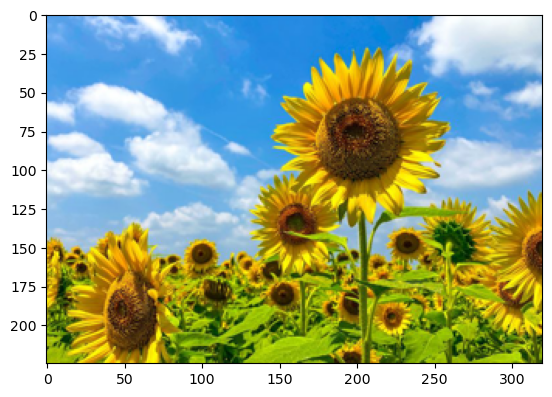

In [14]:
image=Image.open('62f64cf93c182.jpg')
image=image.resize((320,225))
image=np.array(image)
plt.imshow(image)

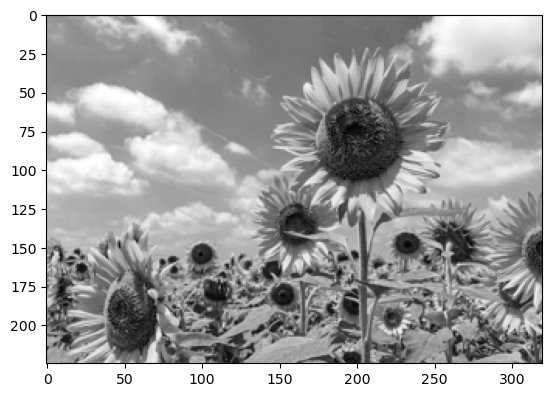

In [15]:
#Membuat gambar menjadi skala abu-abu.
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [16]:
#Segmentasi obyek menjadi 2 bagian yang berbeda berdasarkan nilai threshold yang ditentukan
arr=gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean() :
        arr[i]=1
    else:
        arr[i]=0
gray_segmented=arr.reshape(gray.shape[0],gray.shape[1])

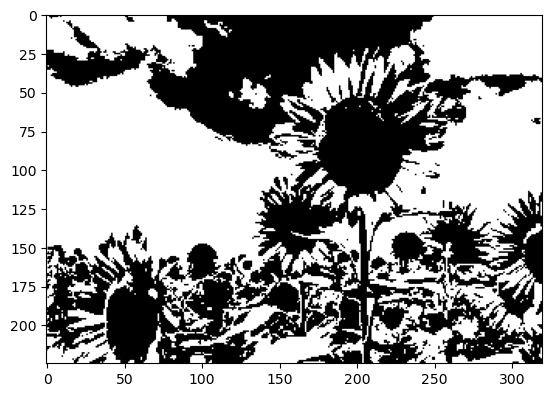

In [17]:
plt.imshow(gray_segmented,cmap='gray')

In [18]:
#Segmentasi obyek menjadi 5 bagian yang berbeda berdasarkan nilai threshold yang ditentukan
arr=gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean():
        arr[i]=4
    elif arr[i]>=0.75:
        arr[i]=3
    elif arr[i]>0.5 :
        arr[i]=2
    elif arr[i]>0.25:
        arr[i]=1
    else:
        arr[i]=0
gray_segmented_2=arr.reshape(gray.shape[0],gray.shape[1])

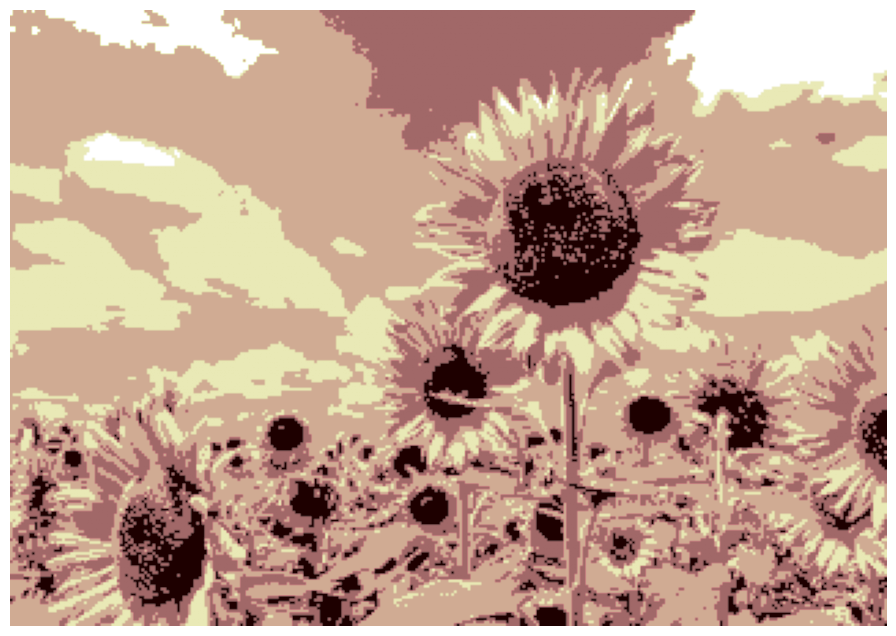

In [19]:
#There are 5 segments in the below image :)
plt.figure(figsize=(18,8))
plt.imshow(gray_segmented_2,cmap='pink')
plt.axis("off")
plt.show()

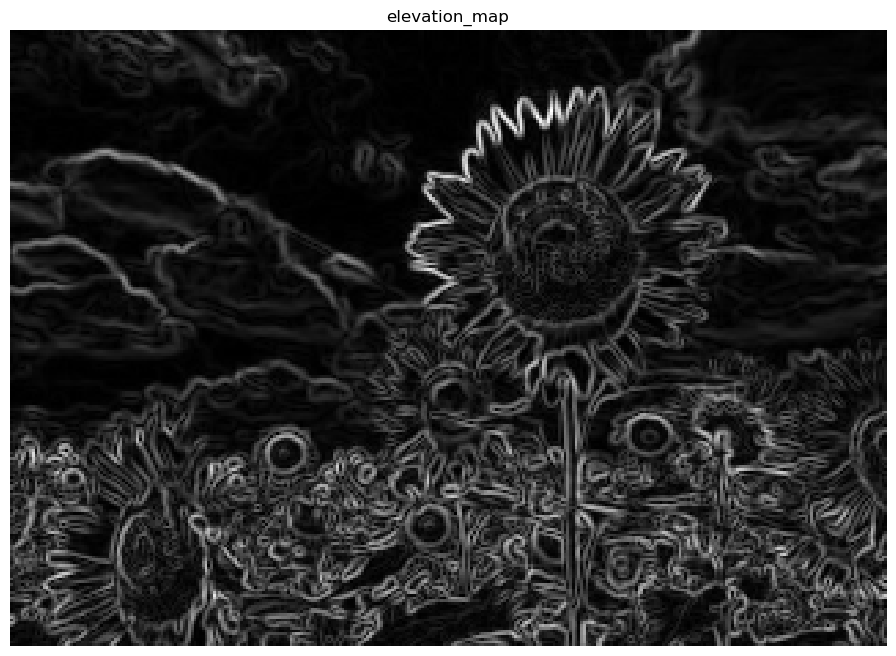

In [20]:
### Memanfaatkan informasi dari nilai histogram
imm=image[:,:,0]
elevation_map = sobel(imm)

fig, ax = plt.subplots(figsize=(18,8))
ax.imshow(elevation_map, cmap='gray', interpolation='nearest')
ax.axis('off')
ax.set_title('elevation_map')
plt.show()

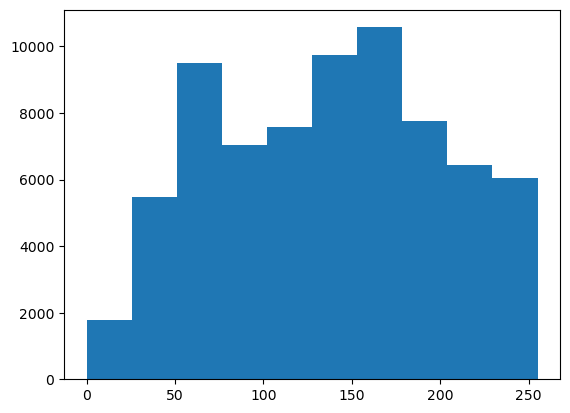

In [21]:
plt.hist(imm.flatten())
plt.show()

Text(0.5, 1.0, 'markers')

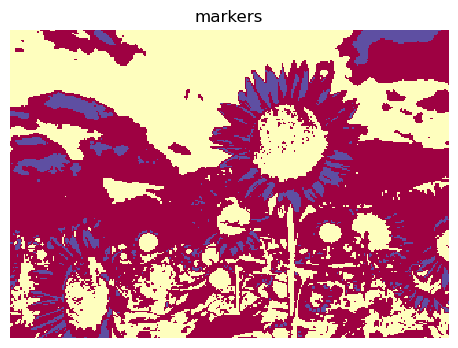

In [22]:
#Melakukan pelabelan terhadap pixel berdasarkan nilai histogram
markers = np.zeros_like(imm)
markers[imm < 117] = 1
markers[imm > 232] = 2

fig, ax = plt.subplots(figsize=(8,4))
ax.imshow(markers, cmap='Spectral', interpolation='nearest')
ax.axis('off')
ax.set_title('markers')

Text(0.5, 1.0, 'segmentation')

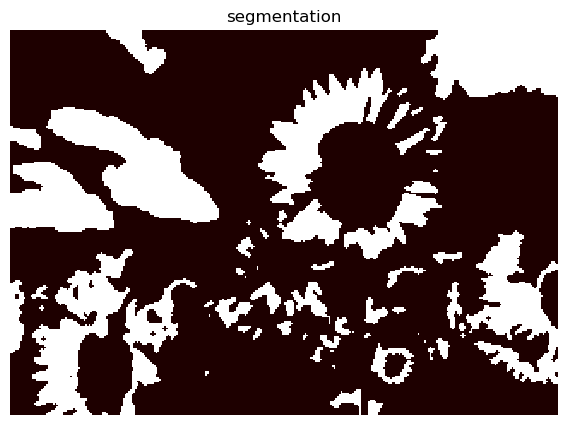

In [23]:
segmentation = skimage.segmentation.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(segmentation, cmap='pink',interpolation='nearest')
ax.axis('off')
ax.set_title('segmentation')

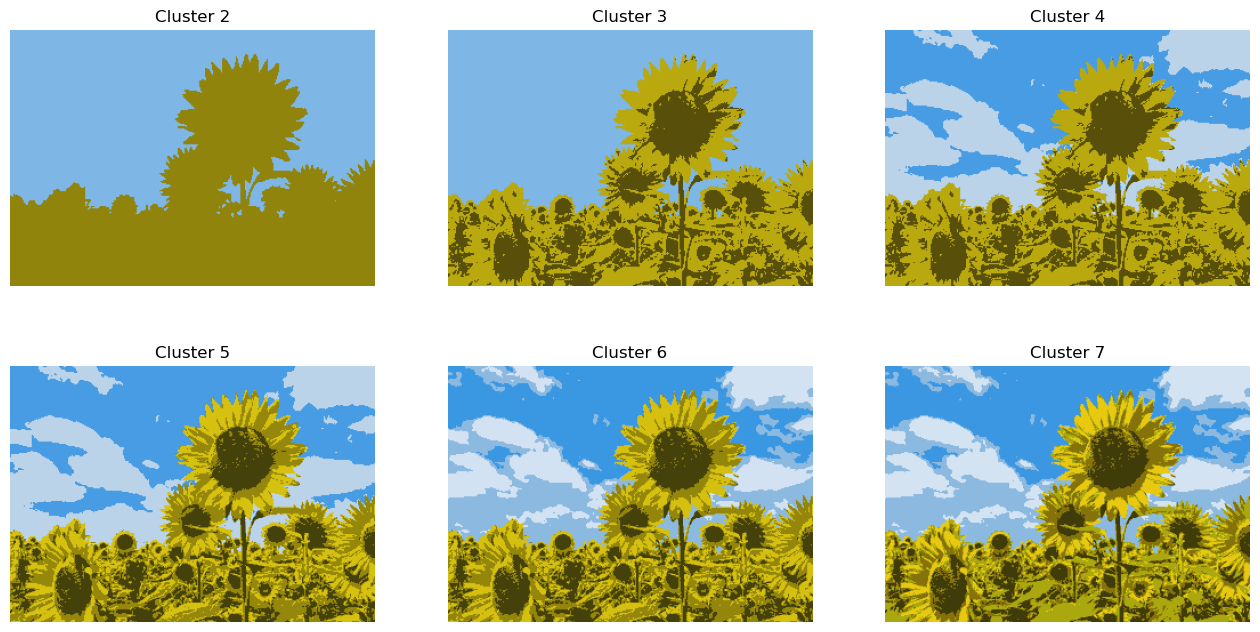

In [24]:
#Segmentasi Dengan Memanfaatkan Nilai Cluster dari Pixel
im=image/255
pic=im.reshape(im.shape[0]*im.shape[1],im.shape[2])

fig, ax = plt.subplots(2, 3, figsize=(16, 8))
count=1
for i in range(2):
    for j in range(3):

        kmeans = KMeans(n_clusters=count+1, random_state=0).fit(pic)
        pic_print = kmeans.cluster_centers_[kmeans.labels_]
        clustered_pic=pic_print.reshape(im.shape[0],im.shape[1],im.shape[2])
        count+=1
        ax[i][j].set_title('Cluster '+str(count))
        ax[i][j].imshow(clustered_pic)
        ax[i][j].set_axis_off()
plt.show()